Курсовой проект <br>

Чернобаев А.А. М8О-114М-23

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_curve, recall_score, precision_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.preprocessing import Normalizer

Датасет CS:GO Round Winner Classification <br>
https://www.kaggle.com/datasets/christianlillelund/csgo-round-winner-classification <br>
Основные поля <br>
<b>time_left</b> - The time left in the current round.	<br>
<b>ct_score</b>	- The current score of the Counter-Terrorist team. <br>
<b>t_score</b>	- The current score of the Terrorist team. <br>	
<b>map</b>	- The map the round is being played on.	E.g. de_dust2, de_inferno and de_overpass <br>
<b>bomb_planted</b> - If the bomb has been planted or not.	False = No, True = Yes <br>
<b>ct_health</b> - The total health of all Counter-Terrorist players.	Player health in range 0-100. <br>
<b>t_health</b> - The total health of all Terrorist players.	Player health in range 0-100. <br>
<b>ct_armor</b> - The total armor of all Counter-Terrorist players. <br>
<b>t_armor</b> - The total armor of all Terrorist players. <br>
<b>ct_money</b> - The total bankroll of all Counter-Terrorist players.	Amount in USD. <br>
<b>t_money</b> - The total bankroll of all Terrorist players.	Amount in USD. <br>
<b>ct_helmets</b> - Number of helmets on the Counter-Terrorist team. <br>
<b>t_helmets</b> - Number of helmets on the Terrorist team. <br>
<b>ct_defuse_kits</b> - Number of defuse kits on the Counter-Terrorist team. <br>
<b>ct_players_alive</b> - Number of alive players on the Counter-Terrorist team.	Range 0 to 5. <br>
<b>t_players_alive</b> - Number of alive players on the Terrorist team.	Range 0 to 5. <br>
<b>ct_weapon_X</b> - Weapon X count on Counter-Terrorist team.	E.g. Ak47, Deagle and UMP45. <br>
<b>t_weapon_X</b> - Weapon X count on Terrorist team.	E.g. Ak47, Deagle and UMP45. <br>
<b>ct_grenade_X</b> - Grenade X count on Counter-Terrorist team.	E.g. HeGrenade, Flashbang. <br>
<b>t_grenade_X</b> - Grenade X count on Terrorist team.	E.g. HeGrenade, Flashbang. <br>
<b>round_winner</b> - Winner.	CT = Counter-Terrorist, T = Terrorist <br>

Импортируем датасет

In [56]:
df = pd.read_csv('csgo_round_snapshots.csv')
print(df.shape)
df.head()

(122410, 97)


,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [58]:
df.isna().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

Пропусков нет

Есть ли значения-дупликаты

In [59]:
duplicate = df[df.duplicated()]
 
print(f"duplicate rows count: {len(duplicate)}")

duplicate rows count: 4962


Удалим их

In [60]:
df.drop_duplicates(inplace=True)

Переведём категориальные метки в числовой формат

In [61]:
from sklearn.preprocessing import LabelEncoder

categorial_cols = ['map', 'bomb_planted', 'round_winner']
LE = LabelEncoder()
for categorial_col in categorial_cols:
    df[categorial_col] = LE.fit_transform(df[categorial_col])

Будем пользоваться двумя массивами - один содержит в себе столбцы, которые слабо коррелируют с таргетной величиной, второй - сильно

In [62]:
low_corr = []
strong_corr = []
for (col_name, corr_val) in df.corr()['round_winner'].to_dict().items():
    if abs(corr_val) < 0.01:
        low_corr.append(col_name)
    if abs(corr_val) > 0.3:
        strong_corr.append(col_name)

print(low_corr)
print(strong_corr)

['t_weapon_bizon', 't_weapon_cz75auto', 't_weapon_g3sg1', 'ct_weapon_m249', 'ct_weapon_mac10', 't_weapon_mag7', 'ct_weapon_mp7', 't_weapon_negev', 'ct_weapon_nova', 't_weapon_nova', 'ct_weapon_p90', 't_weapon_p90', 't_weapon_r8revolver', 't_weapon_sawedoff', 'ct_weapon_scar20', 't_weapon_scar20', 't_weapon_ssg08', 't_weapon_xm1014', 't_weapon_tec9']
['ct_armor', 't_armor', 'ct_helmets', 't_helmets', 'ct_defuse_kits', 'round_winner']


Тепловая карта всех значения с корреляцией больше 0.3 (в абс. цифрах)

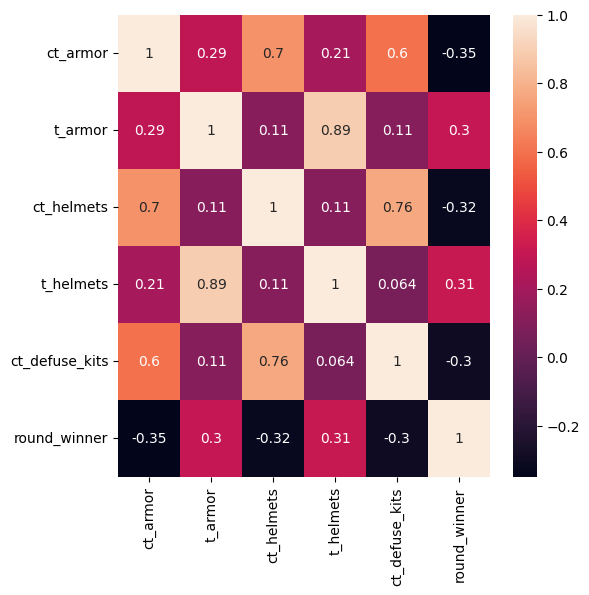

In [63]:
plt.figure(figsize=(6, 6))
sns.heatmap(df[strong_corr].corr(), annot=True);

In [64]:
df[strong_corr].corr()

,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,round_winner
ct_armor,1.000000,0.285420,0.698426,0.209282,0.597773,-0.349212
t_armor,0.285420,1.000000,0.114371,0.891163,0.105334,0.301770
ct_helmets,0.698426,0.114371,1.000000,0.106085,0.763726,-0.321665
t_helmets,0.209282,0.891163,0.106085,1.000000,0.063726,0.312204
ct_defuse_kits,0.597773,0.105334,0.763726,0.063726,1.000000,-0.301018
round_winner,-0.349212,0.301770,-0.321665,0.312204,-0.301018,1.000000


Посмотрим на распределение фичей

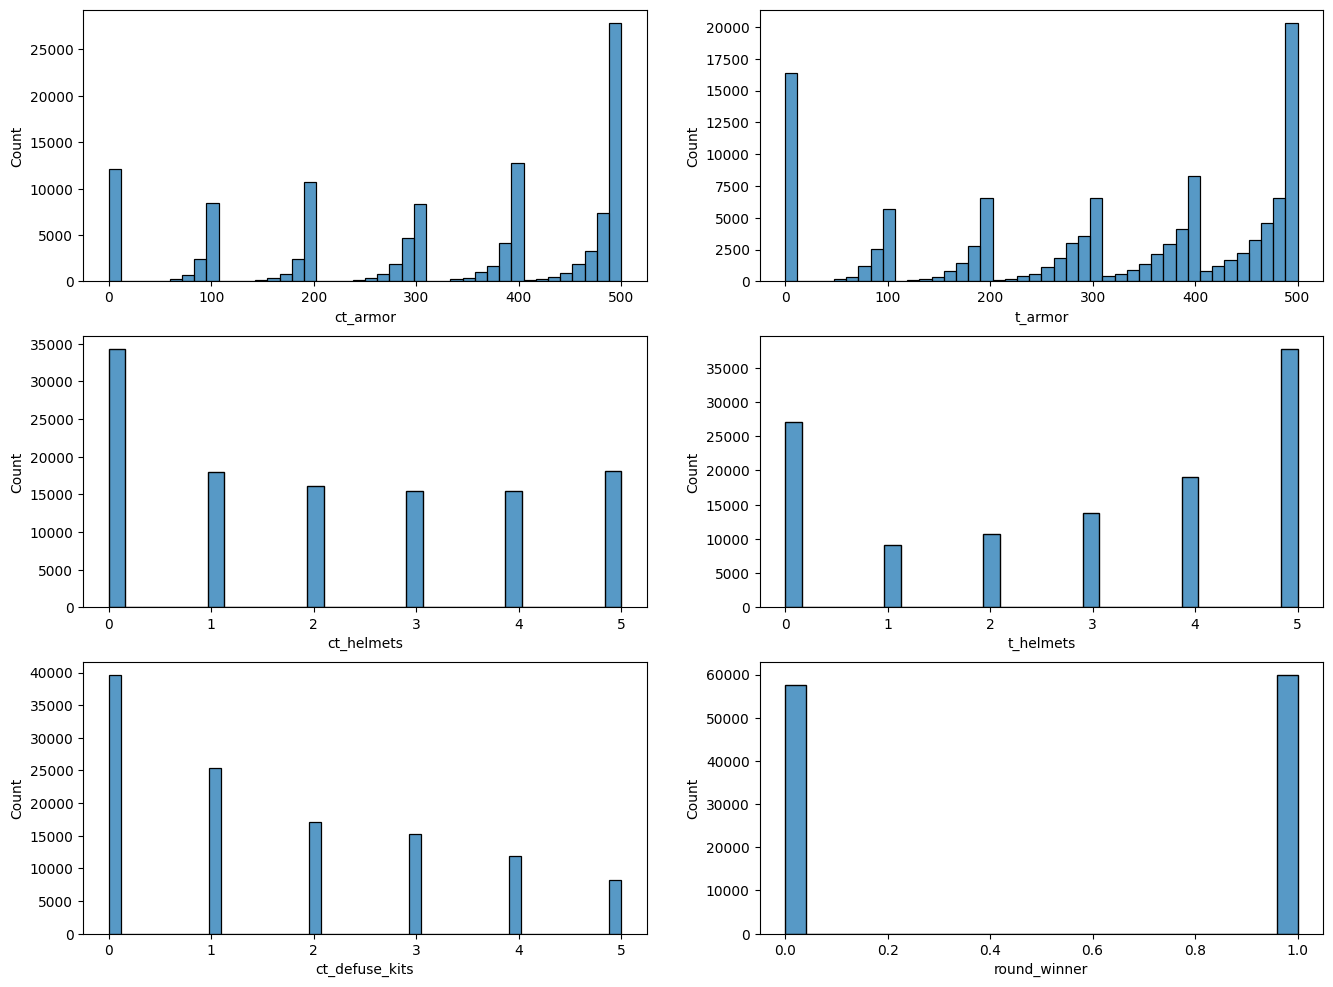

In [65]:
header_index = 0

df_to_plot = df[strong_corr]

fig, ax = plt.subplots(3, 2, figsize=(16, 12))
for row in range(3):
    for col in range(2):
        sns.histplot(df_to_plot[df_to_plot.columns[header_index]], ax = ax[row,col])
        header_index += 1

In [66]:
from sklearn.preprocessing import StandardScaler

class Model():
    def __init__(self):
        self.x = None
        self.y = None
        self.MY_SEED = 322

        self.train_x = None
        self.test_x = None
        self.train_y = None
        self.test_y = None

    def set_x_y(self, df):
        self.x = df.drop("round_winner", axis = 1)
        self.y = df["round_winner"]

    def dataset_train_test_split(self):
        self.train_x, self.test_x, self.train_y, self.test_y = train_test_split(self.x, self.y, train_size = 0.8, 
                                                                                random_state = self.MY_SEED, shuffle = True)
    
    def scale_data(self):
        scaler = StandardScaler()
        scaler.fit(self.train_x)
        self.train_x = scaler.transform(self.train_x)
        self.test_x = scaler.transform(self.test_x)

    def train(self):
        logis = LogisticRegression(tol=0.01, max_iter=1000)
        logis.fit(self.train_x, self.train_y)

        pred = logis.predict(self.test_x)
        return logis.score(self.test_x, self.test_y), mean_squared_error(self.test_y, pred), mean_absolute_error(self.test_y, pred)


Инициализируем модель

In [67]:
model = Model()

Зададим x и y

In [68]:
model.set_x_y(df)

Разделим на тренировочную и тестовую части

In [69]:
model.dataset_train_test_split()

Отскейлим данные

In [70]:
model.scale_data()

Обучим Логистическую регрессию

In [71]:
score, mse, mae = model.train()

Результат

In [72]:
print(f'score:{score}')
print(f'mse:{mse}')
print(f'mae:{mae}')

score:0.7594295444870157
mse:0.24057045551298425
mae:0.24057045551298425


Вывод <br><br>

В ходе выполнения данного курсвого проекта, я решил задачу классфикации с помощью логистической регресии на датасете из игры counter strike. Я определял, кто победит в матче, исходя из описания данных команд. Для решения данной задачи я применил визуализацию данных, провёл работу над датасетом, отскейлил данные и воспользовался логистической регрессий.